# Analyzing Tabular Data using Python and Pandas



## Reading a CSV file using Pandas

Pandas is typically used for working in tabular data (simliar to the data stored in a spreadsheet). Pandas provides helper functions to read data from various file formates like CSV, Excel spreadsheets, HTML tables, JSON, SQL and more. Let's download a file `italy-covid-daywise.csv` which contains daywise Covid-19 data for Italy in the following format:

```
date,new_cases,new_deaths,new_tests
2020-04-21,2256.0,454.0,28095.0
2020-04-22,2729.0,534.0,44248.0
2020-04-23,3370.0,437.0,37083.0
2020-04-24,2646.0,464.0,95273.0
2020-04-25,3021.0,420.0,38676.0
2020-04-26,2357.0,415.0,24113.0
2020-04-27,2324.0,260.0,26678.0
2020-04-28,1739.0,333.0,37554.0
...
```

This format of storing data is known as *comma separated values* or CSV. 

> **CSVs**: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. A CSV file typically stores tabular data (numbers and text) in plain text, in which case each line will have the same number of fields. (Wikipedia)




To read the file, we can use the `read_csv` method from Pandas. Let's being by importing the Pandas library. It is typically imported with the alias `pd`.

In [106]:
import pandas as pd

In [107]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

Data from the file is read and stored in a `DataFrame` object - one of the core data structures in Pandas for storing and working with tabular data. We typically use the `_df` suffix in the variable names for dataframes.

In [108]:
type(covid_df)

pandas.core.frame.DataFrame

In [109]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Here's what we can tell by looking at the data frame:

- The file provides four daywise counts for Covid-19 in Italy
- The metrics reported are new cases, new deaths and new tests
- Data is provided for 248 days: from Dec 31, 2019 to Sep 3, 2020

Keep in mind that these are officially reported numbers, and the actual number of cases & deaths may be higher, as not all cases are diagnosed. 

We can view some basic information about the data frame using the `.info` method.

In [110]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


It appears that each column contains values of a specific data type. For the numeric columns, you can view the some statistical information like mean, standard deviation, minimum/maximum values and number of non-empty values using the `.describe` method.

In [111]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


The `columns` property contains the list of columns within the data frame.

In [112]:
covid_df.columns


Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

You can also retrieve the number of rows and columns in the data frame using the `.shape` method

In [113]:
covid_df.shape

(248, 4)

Here's a summary of the functions & methods we've looked at so far:

* `pd.read_csv` - Read data from a CSV file into a Pandas `DataFrame` object
* `.info()` - View basic infomation about rows, columns & data types
* `.describe()` - View statistical information about numeric columns
* `.columns` - Get the list of column names
* `.shape` - Get the number of rows & columns as a tuple


## Retrieving data from a data frame

The first thing you might want to do is to retrieve data from this data frame e.g. the counts of a specific day or the 
list of values in a specific column. To do this, it might help to understand the internal representation of data in a data frame. Conceptually, you can think of a dataframe as a dictionary of lists: the keys are column names, and the values are lists/arrays containing data for the respective columns. 

In [114]:
# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

In [115]:
type(covid_data_dict)

dict

In [116]:
new_data = pd.DataFrame.from_dict(covid_data_dict)

new_data

,date,new_cases,new_deaths,new_tests
0,2020-08-30,1444,1,53541.0
1,2020-08-31,1365,4,42583.0
2,2020-09-01,996,6,54395.0
3,2020-09-02,975,8,NaN
4,2020-09-03,1326,6,NaN


In [117]:
type(new_data)

pandas.core.frame.DataFrame

Representing data in the above format has a few benefits:

* All values in a column typically have the same type of value, so it's more efficient to store them in a single array.
* Retrieving the values for a particular row simply requires extracting the elements at a given index from each of the column arrays.
* The representation is more compact (column names are recorded only once) compared to other formats where you might use a dictionary for each row of data (example shown below).

In [118]:
# Pandas format is not similar to this
covid_data_list = [
    {'date': '2020-08-30', 'new_cases': 1444, 'new_deaths': 1, 'new_tests': 53541},
    {'date': '2020-08-31', 'new_cases': 1365, 'new_deaths': 4, 'new_tests': 42583},
    {'date': '2020-09-01', 'new_cases': 996, 'new_deaths': 6, 'new_tests': 54395},
    {'date': '2020-09-02', 'new_cases': 975, 'new_deaths': 8 },
    {'date': '2020-09-03', 'new_cases': 1326, 'new_deaths': 6},
]

In [119]:
type(covid_data_list)

list

In [120]:
data = pd.DataFrame(covid_data_list)
data

,date,new_cases,new_deaths,new_tests
0,2020-08-30,1444,1,53541.0
1,2020-08-31,1365,4,42583.0
2,2020-09-01,996,6,54395.0
3,2020-09-02,975,8,NaN
4,2020-09-03,1326,6,NaN


With the dictionary of lists analogy in mind, we can now guess how we might be able to retrieve data from a data frame. for example, we can get a list of values from a specific column using the `[]` indexing notation.

In [121]:
covid_data_dict['new_cases']

[1444, 1365, 996, 975, 1326]

In [122]:
new_data['new_cases']

0    1444
1    1365
2     996
3     975
4    1326
Name: new_cases, dtype: int64

In [123]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Each column is represented using a data structure called `Series`, which is essentially a numpy array with some extra methods and properties.

In [124]:
type(covid_df['new_cases'])

pandas.core.series.Series

Just like arrays, you can retrieve a specific value with a series using the indexing notation `[]`.

In [125]:
covid_df['new_cases'][246]

975.0

In [126]:
covid_df['new_tests'][240]

57640.0

Pandas also provides the `.at` method to directly retrieve at a specific row & column.
- `.at` - retrieve at a specific row & column using row and column index labels
- `.iat` - retrieve at a specific row & column using row and column indices

In [127]:
covid_df.at[246, 'new_cases']

975.0

In [128]:
covid_df.at[240, 'new_tests']

57640.0

In [129]:
covid_df.iat[246, 0]

'2020-09-02'

In [130]:
covid_df.iat[240, 3]

57640.0

In [131]:
type(covid_df.new_cases)

pandas.core.series.Series

Instead of using the indexing notation `[]`, Pandas also allows accessing columns as properties of the data frame using the `.` notation. However, this method only works for columns whose names do not contain spaces or special chracters.

In [132]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [133]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [134]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

Further, you can also pass a list of columns within the indexing notation `[]` to access a subset of the data frame with just the given columns.

In [135]:
cases_df = covid_df[['date', 'new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [136]:
cases_df.drop('new_cases',axis =1 )

,date
0,2019-12-31
1,2020-01-01
2,2020-01-02
3,2020-01-03
4,2020-01-04
...,...
243,2020-08-30
244,2020-08-31
245,2020-09-01
246,2020-09-02


In [137]:
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


Note, however, that the new data frame `cases_df` is simply a "view" of the original data frame `covid_df` i.e. they both point to the same data in the computer's memory, and changing any values inside one of them will also change the respective values in the other. Sharing data between data frames makes data manipulation in Pandas blazing fast, and you needn't worry about the overhead of copying thousands or millions of rows every time you want to crate a new data frame by operating on an exissting one.

Sometimes you might need a full copy of the data frame, in which case you can use the `copy` method.

In [138]:
covid_df_copy = covid_df.copy()

The data within `covid_df_copy` is completely separate from `covid_df`, and changing values inside one of them will not affect the other.

To access a specific row of data Pandas provides the `.loc` method.
- `.loc` - to access a specific row of data using row index labels
- `.iloc` - to access a specific row of data using row indices

In [139]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [140]:
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

Each retrieved row is also a `Series` object.

In [141]:
type(covid_df.loc[243])

pandas.core.series.Series

In [142]:
covid_df.iloc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [143]:
type(covid_df.iloc[243])

pandas.core.series.Series

To view the first or last few rows of data, we can use the `.head` and `.tail` methods.

In [144]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [145]:
covid_df.tail()

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


Notice above that while the first few values in the `new_cases` and `new_deaths` columns are `0`, the corresponding values within the `new_tests` column are `NaN`. That is because the CSV file does not contain any data for the `new_tests` column for certain dates (you can verify this by looking into the file). It's possible that these values are missing or unknown.

In [146]:
covid_df.at[0, 'new_tests']

nan

In [147]:
type(covid_df.at[0, 'new_tests'])

numpy.float64

The distinction between `0` and `NaN` is subtle but important. In this dataset, it represents that daily test numbers were not reported on specific dates. In fact, Italy started reporting daily tests on April 19, 2020. By that time, 935310 tests had already been conducted. 

We can find the first index that doesn't contain a `NaN` value using `first_valid_index` method of a series.

In [148]:
covid_df.new_tests.first_valid_index()

111

Let's look at a few rows before and after this index to verify that the values indeed change from `NaN` to actual numbers. We can do this by passing a range to `loc`.

In [149]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


The `.sample` method can be used to retrieve a random sample of rows from the data frame.

In [150]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
122,2020-05-01,1872.0,285.0,43732.0
108,2020-04-17,3786.0,525.0,NaN
149,2020-05-28,584.0,117.0,39838.0
228,2020-08-15,574.0,3.0,25937.0
235,2020-08-22,947.0,9.0,46613.0
126,2020-05-05,1221.0,195.0,32211.0
175,2020-06-23,221.0,23.0,23225.0
57,2020-02-26,93.0,5.0,NaN
64,2020-03-04,466.0,28.0,NaN
109,2020-04-18,3493.0,575.0,NaN


Notice that even though we have taken a random sample, the original index of each row has been preserved. This is an important and useful property of data frames - each row of data has an index associated with it.



In [151]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [152]:
covid_df.at[243, 'new_cases']

1444.0

In [153]:
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [154]:
covid_df.at[243, 'new_cases']

1444.0

In [155]:
covid_df.iat[243, 1]

1444.0

In [156]:
covid_df.iloc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

## Analyzing Data from data frames

Let's try to answer some questions about our data.

**Q: What is the total number of reported cases and deaths related to Covid-19 in Italy?**

Similar to Numpy arrays, a Pandas series supports the `sum` method to answer these questions.

In [157]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [158]:
# covid_df.new_cases.values.shape

In [159]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [160]:
print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))

The number of reported cases is 271515 and the number of reported deaths is 35497.


**Q: What is the overall death rate (ratio of reported deaths to reported cases)?**

In [161]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()

In [162]:
death_rate

0.13073679170579894

In [163]:
print("The overall reported death rate in Italy is {:.2f} %.".format(death_rate*100))

The overall reported death rate in Italy is 13.07 %.


**Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were being reported.**


We can check the first non-NaN index using `first_valid_index`

In [164]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [165]:
total_tests

5214766.0

**Q: What fraction of test returned a postive result?**

In [166]:
covid_df.head(2)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN


In [167]:
positive_rate = total_cases / total_tests

In [168]:
print('{:.2f}% of tests in Italy led to a positive diagnosis.'.format(positive_rate*100))

5.21% of tests in Italy led to a positive diagnosis.


## Querying and sorting rows

Let's say we want only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to chech which rows satisfy this criterion.

In [60]:
high_new_cases = covid_df.new_cases > 1000

In [61]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

The boolean expression returns a series containing `True` and `False` boolean values. This series can be used to filter out just those rows where the value in the series is `True`. The result is data frame with a subset of rows from the original.

In [62]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


We can write this succintly on a single line by passing the boolean expression as an index to the data frame.

In [169]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [170]:
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [65]:
high_cases_df.head(72)

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


The data frame contains 72 rows, but only the first 5 & last 5 rows are displayed by default with Jupyter, for brevity. To view, all the rows, we can modify some display options.

In [66]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
     display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


We can also formulate more complex queries that involve mutiple columns. As an example, let's try to determine the days when the ratio of cases reported to tests conducted is higher than the overall `positive_rate`.

In [171]:
positive_rate

0.05206657403227681

In [172]:
high_ratio_df = covid_df[(covid_df.new_cases / covid_df.new_tests) > positive_rate]

In [173]:
high_ratio_df.shape

(12, 4)

Performing operations on multiple columns results in a new series.

In [174]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

Further, we can use this series to add a new column to the data frame.

In [71]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [72]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


Keep in mind however, sometimes it takes a few days to get the results for a test, so we can't really compare the number of new cases with the number of tests conducted on the same day. Any inference based on this `positive_rate` column is likely to be incorrect. It's important to watch out for subtle relationships like these which are often not conveyed within the CSV file and require some external context. It's always a good idea to read through the documentation provided with the dataset or ask for more information.

For now, let's remove the `positive_rate` column using the `drop` method.

In [73]:
# covid_df.drop?

In [74]:
covid_df.drop(columns=['positive_rate'], inplace=True)

In [175]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Can you figure out what the `inplace` argument is used for?

### Sorting rows using column values

The rows can also be sorted by a specific column using `.sort_values`. Let's sort to identify the days with the highest number of cases, then chain it with the `head` method to get the 10 days with the most cases.

In [76]:
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


It looks like the last two weeks of March had the highest number of daily cases. Let's compare this to the days where the highest number of deaths were recorded.

In [77]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


It appears that daily deaths hit a peak just about week after the peak in the daily new cases.

Let's also look at the days with the least number of cases. We might expect to see the first few days of the year in this list.

In [176]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


Seems like the count of new cases on June 20th was `-148`, a negative number! Not something we might have expected, but that's the nature of real world data. It could simply be a data entry error, or it's possible that the government may have issued a correction to account for miscounting in the past. Can you dig through news articles online and figure out why the number was negative?

Let's look at the some of days before and after June 20th.

In [177]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


If this was indeed a data entry error, we can use one of the following approaches for dealing with the missing or faulty value:
1. Replace it with `0`.
2. Repalce it with the average of the entire column
3. Replace it with the average of the values on the previous & next date
4. Discard the row entirely

Which approach you pick requires some context about the data and the problem. In this case, since we are dealing data ordered by date, we can pick approach 3. 

The `.at` method can be used to modify a specific value within the data frame.

In [180]:
covid_df.at[172, 'new_cases']

-148.0

In [181]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2

In [182]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


Here's a summary of the functions & methods :

- `covid_df.new_cases.sum()` - finding the sum of values in a column or series
- `covid_df[covid_df.new_cases > 1000]` - querying a subset of rows satisfying the chosen criteria using boolean expressions
- `df['pos_rate'] = df.new_cases/df.new_tests` - adding new columns by combining data from existing columns
- `covid_df.drop('positive_rate')` - Removing one or more columns from the data frame
- `sort_values` - Sorting the rows of a data frame using column values
- `covid_df.at[172, 'new_cases'] = ...` - Replacing a value within the data frame

## Working with dates

While we have looked at overall numbers for the cases, tests, positive rate etc., it would be also be useful to study these numbers on a month-by-month basis. The `date` column might come in handy here, as Pandas provides many utilities for working with dates.

In [83]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

The data type of date is currently `object`, so Pandas does not know that this column is a date. We can convert it into a `datetime` column using the `pd.to_datetime` method.

In [84]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [85]:
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

You can see that it now has the datatype `datetime64`. We can now extract different parts of the data into separate columns, using the `DatetimeIndex` class ([view docs](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html))

In [86]:
pd.DatetimeIndex(covid_df.date)

DatetimeIndex(['2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09',
               ...
               '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
               '2020-08-29', '2020-08-30', '2020-08-31', '2020-09-01',
               '2020-09-02', '2020-09-03'],
              dtype='datetime64[ns]', name='date', length=248, freq=None)

In [142]:
covid_df.head(2)

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy


In [143]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [144]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


Let's check the overall metrics for the month of May. We can query the rows for May, choose a subset of colums that we want to aggregate, and use the `sum` method of the data frame to get the sum of values in each chosen column.

In [145]:
covid_df.month == 5

0      False
1      False
2      False
3      False
4      False
       ...  
243    False
244    False
245    False
246    False
247    False
Name: month, Length: 248, dtype: bool

In [91]:
covid_df[covid_df.month == 5]

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [148]:
#Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4,205463.0,27967.0,1398633.0,Italy
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5,207428.0,28236.0,1429864.0,Italy
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6,209328.0,28710.0,1456911.0,Italy
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0,210717.0,28884.0,1479910.0,Italy
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1,211938.0,29079.0,1512121.0,Italy
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2,213013.0,29315.0,1549892.0,Italy
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3,214457.0,29684.0,1563557.0,Italy
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4,215858.0,29958.0,1608985.0,Italy
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5,217185.0,30201.0,1645076.0,Italy
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6,218268.0,30395.0,1676460.0,Italy


In [149]:
# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]
covid_df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [154]:
# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [156]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [157]:
type(covid_may_totals)

pandas.core.series.Series

The operations above can also be combined into a single statement.

In [165]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

Here's another example, let's check if the number of cases reported on Sundays is higer than the average number of cases reported every day. This time, we might wan to aggregate using the `.mean` method.

In [174]:
# Overall average
covid_df.new_cases.mean()

1096.6149193548388

In [175]:
covid_df.new_cases.std()

1553.3229568895183

In [177]:
# Average for Sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

It seems like more cases were reported on Sundays compared to other days.


## Grouping and aggregation

As a next step, we might want to summarize the daywise data and create a new dataframe with month-wise data. This is where the `groupby` funtion is useful. Along with a grouping, we need to specify a way to aggregate the data for each group.

In [178]:
covid_df.groupby('month')

In [180]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [181]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [182]:
import seaborn as sns

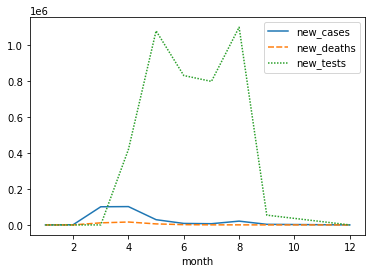

In [187]:
sns.lineplot(data=covid_month_df);


In [188]:
df_z_scaled = covid_month_df.copy() 

for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    

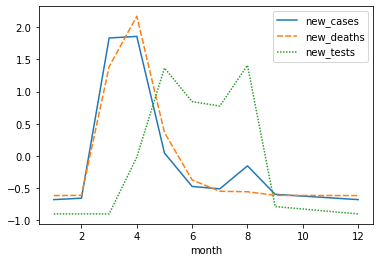

In [189]:
sns.lineplot(data=df_z_scaled);

The result is a new data frame, which uses unique values from the column passed to `groupby` as the index. Grouping and aggregation is a really powerful method of progressively summarizing data into smaller data frames.

Instead of aggregating by sum, you can also aggregate by other measures like mean

In [106]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()

In [107]:
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,273.916667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


Apart from grouping, another form of aggregation is to calculate the running or cumulative sum of cases, tests or death up to the current date for each row. This can be done using `cumsum` method. Let's add 3 new columns: `total_cases`, `total_deaths` and `total_tests`.

In [190]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [191]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()

In [193]:
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

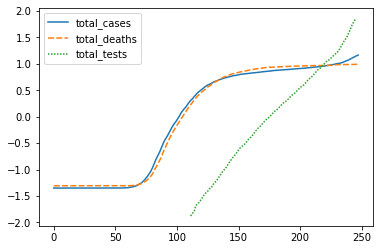

In [195]:
df_z_scaled_new = covid_df[['total_cases', 'total_deaths', 'total_tests']].copy()

for column in df_z_scaled_new.columns:
    df_z_scaled_new[column] = (df_z_scaled_new[column] -
                           df_z_scaled_new[column].mean()) / df_z_scaled_new[column].std()    
sns.lineplot(data=df_z_scaled_new);

We've also included the intial test count in `total_test` to account for test conducted before daily reporting was started. 

In [196]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


Notice how the `NaN` values in the `total_tests` column remain unaffected.

## Merging data from multiple sources

To determine other metrics like test per million, cases per million etc. we require some more information about the country viz. it's population. Let's use another file `locations.csv` which contains health-related information for different countries around the world, including Italy.

In [198]:
locations_df = pd.read_csv('locations.csv')

In [199]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [200]:
locations_df.columns

Index(['location', 'continent', 'population', 'life_expectancy',
       'hospital_beds_per_thousand', 'gdp_per_capita'],
      dtype='object')

In [203]:
locations_df[locations_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column. So let's insert a `location` column in the `covid_df` dataframe with all values set to `"Italy"`.

In [116]:
covid_df['location'] = 'Italy'

In [117]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


We can now add the columns from `locations_df` into `covid_df` using the `.merge` method.

In [118]:
merged_df = covid_df.merge(locations_df, on="location")

In [205]:
merged_df.shape

(248, 20)

The location data for Italy is appended to each row within `covid_df`. If the `covid_df` data frame contained data for multiple locations, then the location-replaced data for the respective country would be appended for each row.

We can now calculate metrics like cases per million, deaths per million and tests per million.

In [120]:
1e6

1000000.0

In [207]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [208]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [209]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [212]:
merged_df.tail()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN
247,2020-09-03,1326.0,6.0,NaN,2020,9,3,3,271960.5,35497.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4498.052887,587.097697,NaN


In [213]:
merged_df.head()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.0,0.0,NaN


## Writing data back to files

After doing some analysis and adding new columns to the data frame, it would be a good idea to write the results back to a file, otherwise the data will be lost when the Jupyter notebook shuts down. Before writing to file, let us first create a data frame containing the specific set of columns that we want to write into the file.

In [126]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

In [127]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,270634.5,8.0,35491.0,NaN,NaN,4476.121695,586.998461,NaN


To write the data from the data frame into a file, we can use the `to_csv` function. 

In [214]:
result_df.to_csv('results.csv', index=None)

In [215]:
result_df.to_excel('results.xlsx', index=None)

The `to_csv` function also includes an additional column for storing the index of the dataframe by default. We pass `index=None` to turn off this behavior. You can now verify that the `results.csv` is created and contains data from the data frame in CSV format:

```
date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
2020-02-27,78.0,400.0,1.0,12.0,,,6.61574439992122,0.1984723319976366,
2020-02-28,250.0,650.0,5.0,17.0,,,10.750584649871982,0.28116913699665186,
2020-02-29,238.0,888.0,4.0,21.0,,,14.686952567825108,0.34732658099586405,
2020-03-01,240.0,1128.0,8.0,29.0,,,18.656399207777838,0.47964146899428844,
2020-03-02,561.0,1689.0,6.0,35.0,,,27.93498072866735,0.5788776349931067,
2020-03-03,347.0,2036.0,17.0,52.0,,,33.67413899559901,0.8600467719897585,
...
```

## Bonus: Basic Plotting with Pandas

While we typically use a library like `matplotlib` or `seaborn` plot graphs with a Juptyer notebook, Pandas data frames & series also provide a handy `.plot` method for quick and easy plotting.

Let's plot line graph showing how the no. of daily cases varies over time using the `plot` method of a Pandas series.

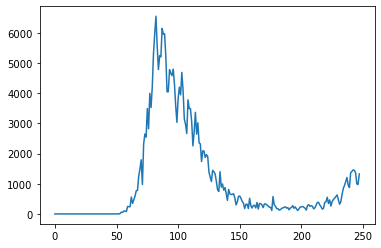

In [130]:
result_df.new_cases.plot();

While this plot shows the overall trend, it's hard to tell where the peak occured, as there are no dates on the X axis. We can use the `date` column as the index for the data frame to address this issue.

In [131]:
result_df.set_index('date', inplace=True)

In [132]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403


That's right, the index of a data frame doesn't have to be numeric. Turn the date into the index also allows us to get the data for a specific data using `.loc`

In [133]:
result_df.loc['2020-09-01']

new_cases             9.960000e+02
total_cases           2.696595e+05
new_deaths            6.000000e+00
total_deaths          3.548300e+04
new_tests             5.439500e+04
total_tests           5.214766e+06
cases_per_million     4.459996e+03
deaths_per_million    5.868661e+02
tests_per_million     8.624890e+04
Name: 2020-09-01 00:00:00, dtype: float64

Let's plot the new cases & new deaths per day as line graphs.

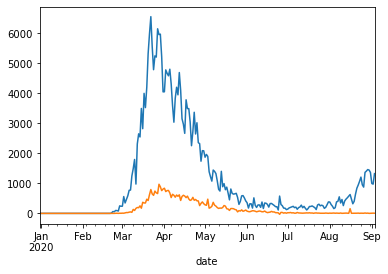

In [134]:
result_df.new_cases.plot()
result_df.new_deaths.plot();

We can also compare the total cases vs. total deaths.

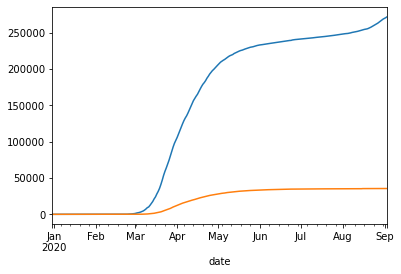

In [135]:
result_df.total_cases.plot()
result_df.total_deaths.plot();

Let's see how the death rate and positive testing rates vary over time.

In [136]:
death_rate = result_df.total_deaths / result_df.total_cases

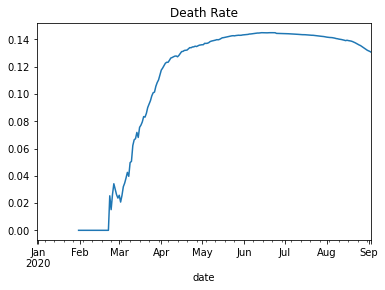

In [137]:
death_rate.plot(title='Death Rate');

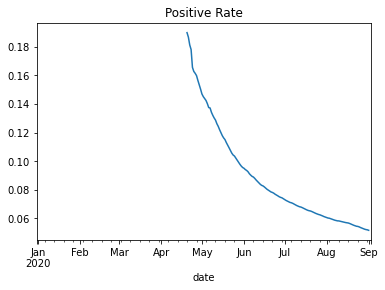

In [138]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate');

Finally, let's plot some month-wise data using a bar chart to visualize the trend at a higher level.

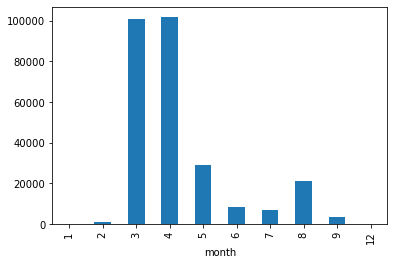

In [139]:
covid_month_df.new_cases.plot(kind='bar');

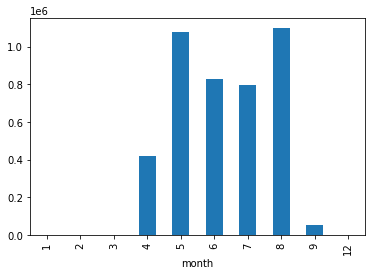

In [140]:
covid_month_df.new_tests.plot(kind='bar');

## Exercises and Further Reading
Check out the following resources to learn more about Pandas:

* Pandas exercises: https://github.com/guipsamora/pandas_exercises
* User guide for Pandas: https://pandas.pydata.org/docs/user_guide/index.html
* Python for Data Analysis (book by Wes McKinney - creator of Pandas): https://www.oreilly.com/library/view/python-for-data/9781491957653/
